In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading dataset and checking basic information about the dataset

In [2]:
df=pd.read_csv('Fraud.csv')
df1=df.copy()# making copy of original Dataset incase of data lose
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As we can observe there is 6362620 entries and 11 columns and we dont have any null values in this dataset

In [7]:
genuine = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
genuine_perc=(genuine)/(genuine+fraud)*100
fraud_perc=(fraud)/(fraud+genuine)*100

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:>

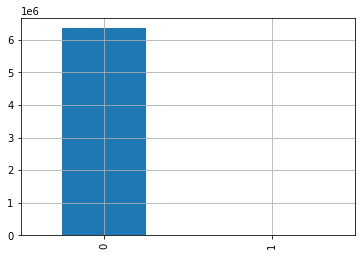

In [9]:
df['isFraud'].value_counts().plot(kind='bar',grid=True)

In [10]:
print("Total no. of genuine transactions are:",genuine)
print("Total no. of fraud transactios are:",fraud)
print("Percentage of genuine transactions: {:.2f} %".format(genuine_perc))
print("Percentage of fraud transactions:{:.2f}%".format(fraud_perc))

Total no. of genuine transactions are: 6354407
Total no. of fraud transactios are: 8213
Percentage of genuine transactions: 99.87 %
Percentage of fraud transactions:0.13%


<AxesSubplot:ylabel='type'>

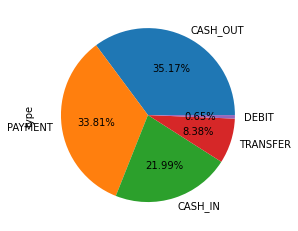

In [11]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f%%")

In [12]:
pd.crosstab(df['type'],df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


Observing above scenarios we can say that maximum fraud cases are being registered when we are doind cash_out process and when we are Transfering the amount

<AxesSubplot:>

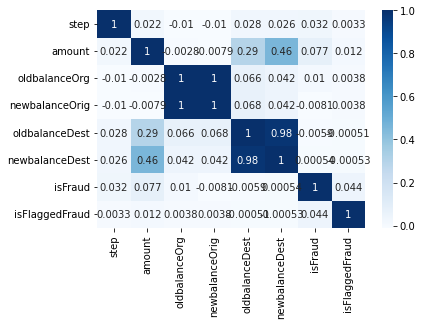

In [13]:
corre=df.corr()
sns.heatmap(corre,annot=True,cmap='Blues')

There are have some columns which show highly multicolinearity

In [14]:
objectlist=df.select_dtypes(include='object').columns
objectlist

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in objectlist:
    df[i]=le.fit_transform(df[i].astype(str))

we just encoded the objects usig label encoder as machine only understand numerical values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(df):
    vif=pd.DataFrame()
    vif['features']=df.columns
    vif['vif_factors']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return vif

Now we will handle the multicolinearity using some methods where we will Testing for Multicollinearity with 
Variance Inflation Factors. it dentifies correlation between independent variables and the strength of that
correlation. A value of 1 indicates that there is no correlation between this independent variable and any others.
VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant 
corrective measures. VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are 
poorly estimated, and the p-values are questionable. Multicollinearity affects the coefficients and p-values, but
it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your
primary goal is to make predictions, and you don’t need to understand the role of each independent variable,
you don’t need to reduce severe multicollinearity.

In [18]:
cal_vif(df)

,features,vif_factors
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [19]:
df['actual_amount']=df.apply(lambda x: x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
df['actual_amount_dest']=df.apply(lambda x: x['oldbalanceDest']-x['newbalanceDest'],axis=1)
df['transaction_path']=df.apply(lambda x: x['nameOrig']+x['nameDest'],axis=1)

In [20]:
df=df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

In [21]:
cal_vif(df)

,features,vif_factors
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,actual_amount,1.307910
5,actual_amount_dest,3.754335
6,transaction_path,2.677167


<AxesSubplot:>

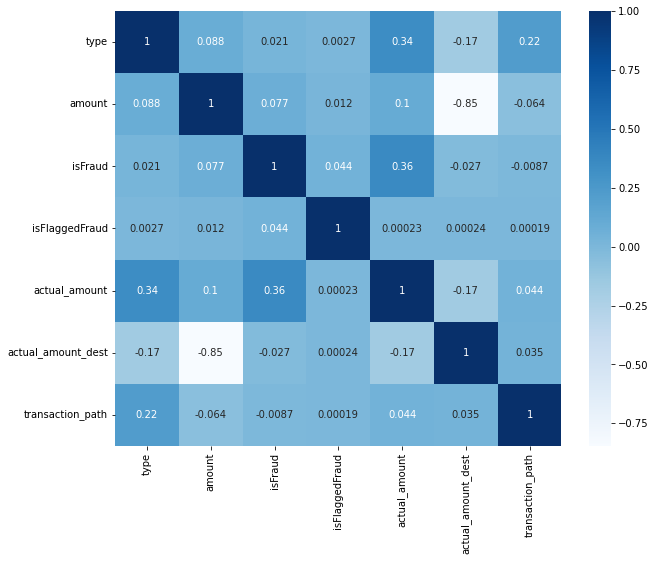

In [22]:
corr_new=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_new,annot=True,cmap='Blues')

 Now our data looks much stable and reliable

In [23]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df['StdAmount']=std.fit_transform(df['amount'].values.reshape(-1,1))
df.drop(['amount'],axis=1,inplace=True)

We did feature scaling to represent our dataset in a perticular range and Im not doind scaling on whole dataset as it can reduce our accuracy

In [24]:
y=df['isFraud']
x=df.drop(['isFraud'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
print("Shape of X_train: ", xtrain.shape)
print("Shape of X_test: ", xtest.shape)
print("Shape of Y_train: ", ytrain.shape)
print("Shape of Y_test: ", ytest.shape)

Shape of X_train:  (1908786, 6)
Shape of X_test:  (4453834, 6)
Shape of Y_train:  (1908786,)
Shape of Y_test:  (4453834,)


In [27]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

As we can see our data is highly imbalanced so can handle imbalanced dataset using synthetic oversampling by addling some sythetic samples to the minority class

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)

In [30]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

Im fitting logistic regression model in this problem as its very fast and effective but here would have used Decision 
tree and random forest but due to system issues Im not applying them 

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2')
lr.fit(xtrain,ytrain)
ypread=lr.predict(xtest)
lr_score=lr.score(xtest,ytest)

In [50]:
lr_score

0.9980845716297464

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
print("Accuracy of the model is:",accuracy_score(ytest,ypread))

Accuracy of the model is: 0.9980845716297464


In [53]:
tn, fp, fn, tp = confusion_matrix(ytest, ypread).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 2203
False Positives: 4956
True Negatives: 4443100
False Negatives: 3575


In [54]:
print("Classification report")
print(classification_report(ytest,ypread))

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448056
           1       0.31      0.38      0.34      5778

    accuracy                           1.00   4453834
   macro avg       0.65      0.69      0.67   4453834
weighted avg       1.00      1.00      1.00   4453834



A we can see accuracy of model is great but F1 score is very poor as we have used Logistic regression but If we have 
used Decision tree and random forest then F1 score would have been much better but due to system issue of mine 
I havent used them

What are the key factors that predict fraudulent customer?

The source of request is secured or not ?

Is the name of organisation asking for money is legit or not ?

Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?

Use smart vertified apps only.

Browse through secured websites.

Use secured internet connections (USE VPN).

Keep your mobile and laptop security updated.

Don't respond to unsolicited calls/SMS(s/E-mails.

If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

Bank sending E-statements.

Customers keeping a check of their account activity.

Always keep a log of your payments.